# OBJECTIVE : Prediction task is to determine whether a person makes over 50K a year.

# Step1: Import Dependenceis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
%matplotlib inline
pd.set_option("display.max_columns",None)

In [2]:
#ignore warnings
import warnings 
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('adult_data.csv',header = None,delimiter = ' *, *')

In [4]:
df.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [5]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                    'marital_status', 'occupation', 'relationship',
                    'race', 'sex', 'capital_gain', 'capital_loss',
                    'hours_per_week', 'native_country', 'income']

In [6]:
df.head(8)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K


In [7]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [8]:
df.shape

(32561, 15)

In [9]:
def create_piechart(data, column):
    """
    Objective
    ---------- 
    Create Pie chart for Categorical variables present in Pandas DataFrame
    
    Parameters
    ----------
    data: pandas DataFrame
        This is the pandas DataFrame.
    column: str
        This is the column name which is used to create the plot.
        
    Returns
    ----------
    None
        This will show the pie chart.
    """
    labels = list(data[column].value_counts().to_dict().keys())
    sizes = list(data[column].value_counts().to_dict().values())  # Corrected 'datae' to 'data'
   
    plt.figure(figsize=(5,5))  # Moved the figure creation here
    plt.pie(sizes, 
            labels=labels, 
            autopct='%1.2f%%',
            shadow=False, 
            startangle=45)
    
    plt.axis('equal')  
    plt.title("Pie Chart - {}".format(column))
    plt.show()

def missing_data(df):
    """
    Objective
    ----------
    It shows the missing data in each column with 
    total missing values, percentage of missing value and
    its data type in descending order.
    
    Parameters
    ----------
    df: pandas DataFrame
        Input DataFrame.
    
    Returns
    ----------
    missing_data: pandas DataFrame
        Output DataFrame.
    """
    
    total = df.isnull().sum().sort_values(ascending=False)
    percent = round((df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending=False), 2)
    data_type = df.dtypes
    missing_data = pd.concat([total, percent, data_type], axis=1, keys=['Total', 'Percent', 'Data_Type']).sort_values("Total", axis=0, ascending=False)
    
    return missing_data


<Figure size 500x500 with 0 Axes>

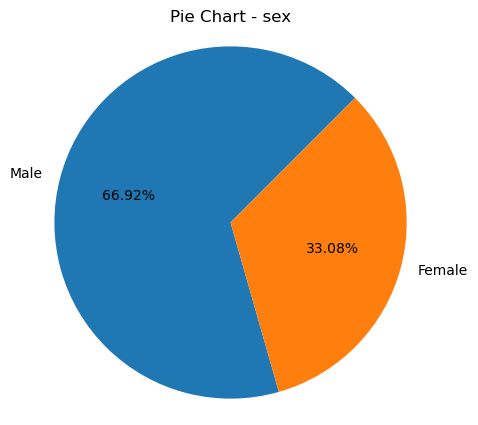

In [124]:
plt.figure(figsize=(5,5))
create_piechart(df, "sex")


we have 33% female and 67% male employee

<Figure size 500x500 with 0 Axes>

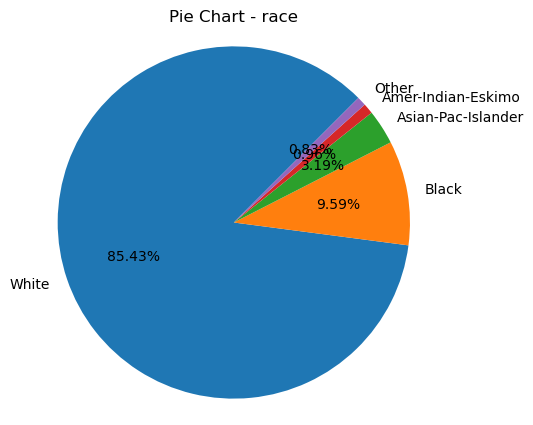

In [11]:
plt.figure(figsize=(5,5))
create_piechart(df, "race")

<Figure size 500x500 with 0 Axes>

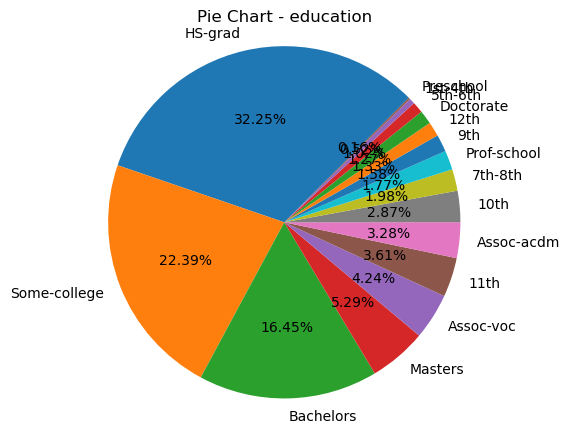

In [12]:
plt.figure(figsize=(5,5))
create_piechart(df,"education")

<Figure size 500x500 with 0 Axes>

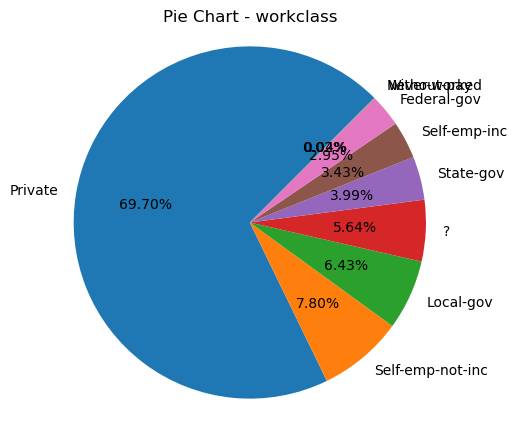

In [13]:
plt.figure(figsize=(5,5))
create_piechart(df, "workclass")

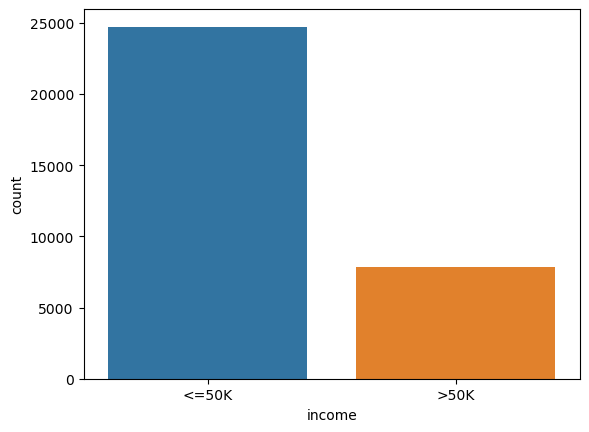

In [14]:
sns.countplot(x = df["income"])
plt.show()

In [15]:
adult_df_rev = pd.DataFrame.copy(df)

In [16]:
adult_df_rev = adult_df_rev.drop(["education","fnlwgt"], axis=1)

In [17]:
adult_df_rev.shape

(32561, 13)

In [18]:
adult_df_rev.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [19]:
for i in adult_df_rev.columns:
    print(i, "--"*25)
    print(adult_df_rev[i].value_counts())
    print()

age --------------------------------------------------
age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64

workclass --------------------------------------------------
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

education_num --------------------------------------------------
education_num
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: count, dtype: int64

marital_status --------------------------------------------------
marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced           

In [20]:
adult_df_rev = adult_df_rev.replace([" ? "], np.nan)

In [21]:
missing_data(adult_df_rev)

,Total,Percent,Data_Type
age,0,0.0,int64
workclass,0,0.0,object
education_num,0,0.0,int64
marital_status,0,0.0,object
occupation,0,0.0,object
relationship,0,0.0,object
race,0,0.0,object
sex,0,0.0,object
capital_gain,0,0.0,int64
capital_loss,0,0.0,int64


<Axes: >

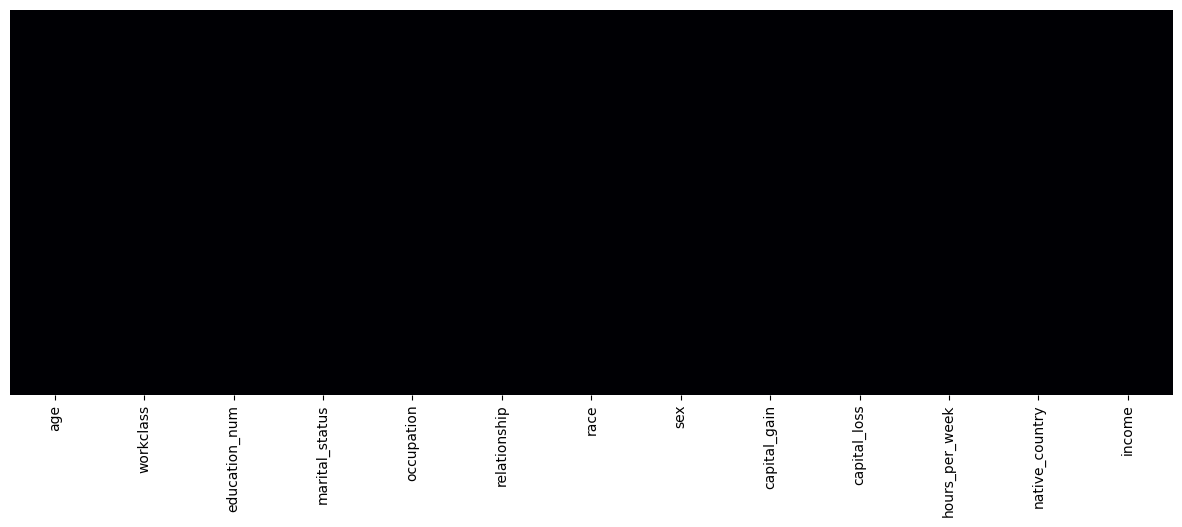

In [22]:
plt.figure(figsize=(15,5))
sns.heatmap(adult_df_rev.isnull(), 
            cbar = False, 
            yticklabels=False, 
            cmap="magma" )

In [23]:
adult_df_rev["workclass"].mode()

0    Private
Name: workclass, dtype: object

In [24]:
print(adult_df_rev["workclass"].mode()[0])
print(adult_df_rev["occupation"].mode()[0])
print(adult_df_rev["native_country"].mode()[0])

Private
Prof-specialty
United-States


In [25]:
#replace the missing values with mode values
for value in ["workclass","occupation", 'native_country']:
    adult_df_rev[value].fillna(adult_df_rev[value].mode()[0],
                               inplace= True)

<Axes: >

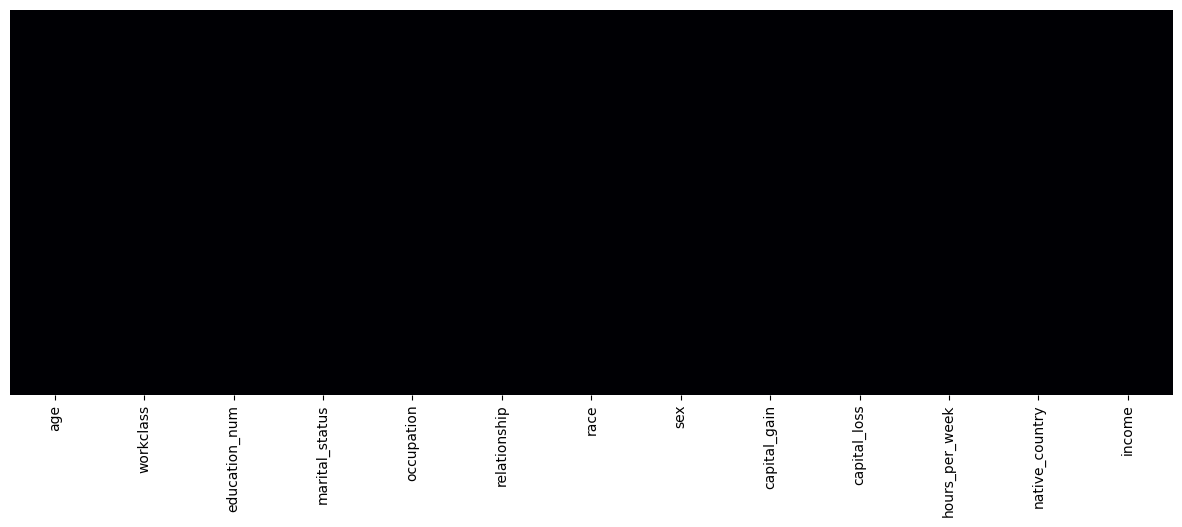

In [26]:
plt.figure(figsize=(15,5))
sns.heatmap(adult_df_rev.isnull(), 
            cbar = False, 
            yticklabels=False, cmap="magma" )

In [27]:
adult_df_rev.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [28]:

colname_cat = ['workclass', 
          'marital_status', 'occupation',
          'relationship','race', 'sex',
          'native_country', 'income']

colname_cat

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [29]:
adult_df_rev[colname_cat]

,workclass,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...
32556,Private,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [30]:
colname_cat=[]
for x in adult_df_rev.columns:
    if adult_df_rev[x].dtype == "object":
        colname_cat.append(x)

In [31]:
colname_cat

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [32]:
adult_df_rev.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Encoding Techniques

## 1. Using Dummy Varibales

In [33]:
adult_df_rev_new = pd.get_dummies(adult_df_rev, drop_first = True)
adult_df_rev_new.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native_country_Cambodia,native_country_Canada,native_country_China,native_country_Columbia,native_country_Cuba,native_country_Dominican-Republic,native_country_Ecuador,native_country_El-Salvador,native_country_England,native_country_France,native_country_Germany,native_country_Greece,native_country_Guatemala,native_country_Haiti,native_country_Holand-Netherlands,native_country_Honduras,native_country_Hong,native_country_Hungary,native_country_India,native_country_Iran,native_country_Ireland,native_country_Italy,native_country_Jamaica,native_country_Japan,native_country_Laos,native_country_Mexico,native_country_Nicaragua,native_country_Outlying-US(Guam-USVI-etc),native_country_Peru,native_country_Philippines,native_country_Poland,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income_>50K
0,39,13,2174,0,40,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,50,13,0,0,13,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,38,9,0,0,40,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,53,7,0,0,40,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,28,13,0,0,40,False,False,False,True,False,False,False,False,False,True,False,Fals

In [34]:
adult_df_rev_new.shape

(32561, 85)

### 2 OneHotEncoder

In [35]:
from sklearn import preprocessing

In [97]:
# Assuming y_train is one-hot encoded
import numpy as np
from sklearn.linear_model import LogisticRegression

# Convert one-hot encoded labels back to class labels
y_train_labels = np.argmax(y_train, axis=1)

# Create a logistic regression model
classifier = LogisticRegression()

# Fit the model to the training data
classifier.fit(x_train_scale, y_train_labels)


LogisticRegression()

In [98]:
adult_df_rev_cat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [99]:
adult_df_rev_cat.shape

(32561, 88)

In [100]:
colname_num=[]
for x in adult_df_rev.columns:
    if adult_df_rev[x].dtype!='object':
        colname_num.append(x)
colname_num


['age',
 'workclass',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income']

In [101]:
adult_df_rev_num = adult_df_rev[colname_num]

In [102]:
adult_df_rev_num.head(8)

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,13,2,4,0,4,1,0,0,13,39,0
2,38,4,9,0,6,1,4,1,0,0,40,39,0
3,53,4,7,2,6,0,2,1,0,0,40,39,0
4,28,4,13,2,10,5,2,0,0,0,40,5,0
5,37,4,14,2,4,5,4,0,0,0,40,39,0
6,49,4,5,3,8,1,2,0,0,0,16,23,0
7,52,6,9,2,4,0,4,1,0,0,45,39,1


In [103]:
adult_df_rev_new=pd.concat([adult_df_rev_num,adult_df_rev_cat],axis = 1)
adult_df_rev_new.head(8)

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87
0,39,7,13,4,1,1,4,1,2174,0,40,39,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,50,6,13,2,4,0,4,1,0,0,13,39,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,38,4,9,0,6,1,4,1,0,0,40,39,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,53,4,7,2,6,0,2,1,0,0,40,39,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,28,4,13,2,10,5,2,0,0,0,40,5,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,37,4,14,2,4,5,4,0,0,0,40,39,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,49,4,5,3,8,1,2,0,0,0,16,23,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,52,6,9,2,4,0,4,1,0,0,45,39,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [104]:
adult_df_rev_new.shape

(32561, 101)

## Label Encoder

In [129]:
colname_cat = []
for x in adult_df_rev.columns:
    if adult_df_rev[x].dtype == 'object':
        colname_cat.append(x)
colname_cat

[]

In [130]:
#for preprocessing the data
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for x in colname_cat:
    adult_df_rev[x] = le.fit_transform(adult_df_rev[x])
    print()
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mappimg',le_name_mapping)

In [107]:
adult_df_rev.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,13,2,4,0,4,1,0,0,13,39,0
2,38,4,9,0,6,1,4,1,0,0,40,39,0
3,53,4,7,2,6,0,2,1,0,0,40,39,0
4,28,4,13,2,10,5,2,0,0,0,40,5,0


In [131]:
adult_df_rev.shape

(32561, 13)

In [132]:
adult_df_rev.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,13,2,4,0,4,1,0,0,13,39,0
2,38,4,9,0,6,1,4,1,0,0,40,39,0
3,53,4,7,2,6,0,2,1,0,0,40,39,0
4,28,4,13,2,10,5,2,0,0,0,40,5,0


## spliting data into Depedent and Independent

In [135]:
# values function create array and iloc creates dataframe so use values 
# if you large data which is faster
X = adult_df_rev.values[:, 0:-1]
y = adult_df_rev.values[:,-1]

In [136]:
x.shape,y.shape

((32561, 12), (32561,))

## Spliting Data Into train test¶

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
#Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=24)  
print("Train Size: ", X_train.shape, y_train.shape)
print("Test Size: ", X_test.shape, y_test.shape)

Train Size:  (22792, 12) (22792,)
Test Size:  (9769, 12) (9769,)


## Data Scaling

In [139]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [140]:
# mean = 0 and std = 1
# scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)
# convert y into int
y=y.astype(int) # 1 0 " 1"

In [141]:
x_train_scale

array([[0.02739726, 0.        , 0.6       , ..., 0.        , 0.39795918,
        0.95121951],
       [0.10958904, 0.5       , 0.53333333, ..., 0.        , 0.34693878,
        0.95121951],
       [0.46575342, 0.5       , 0.53333333, ..., 0.        , 0.45918367,
        0.95121951],
       ...,
       [0.65753425, 0.5       , 0.4       , ..., 0.        , 0.19387755,
        0.95121951],
       [0.15068493, 0.5       , 0.53333333, ..., 0.        , 0.39795918,
        0.95121951],
       [0.10958904, 0.5       , 0.53333333, ..., 0.        , 0.39795918,
        0.95121951]])

## Running a basic model

In [147]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [152]:
%%time
classifier = LogisticRegression()   #create a model

classifier.fit(x_train_scale,y_train)  #fitting training data to model


CPU times: total: 31.2 ms
Wall time: 109 ms


LogisticRegression()

In [154]:
#predict using the model

y_pred = classifier.predict(x_test_scale)
print(list(zip(y_test, y_pred)))

[(0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0),

In [157]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [161]:
accuracy_score(y_true = y_test,
               y_pred = y_pred)

0.8207595455010749

In [163]:
confusion_matrix(y_true = y_test,
                 y_pred = y_pred)

array([[6953,  422],
       [1329, 1065]], dtype=int64)

In [164]:
print(classification_report(y_true = y_test,
                            y_pred = y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7375
           1       0.72      0.44      0.55      2394

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769



In [165]:
def model_evaluation(y_test, y_pred):   
    """
    objective: to evalute model performance
    
    parmas:
        y_test: 
        y_pred: 
    """
    print("------------- Confusion Matrix-------------")
    print(confusion_matrix(y_true=y_test,
               y_pred=y_pred))
    print("------------- Classification Report -------------")
    print(classification_report(y_true=y_test,
               y_pred=y_pred))
    print("------------- Accuracy Score  -------------")
    print(accuracy_score(y_true=y_test,
               y_pred=y_pred))

In [167]:
model_evaluation(y_test,y_pred)

------------- Confusion Matrix-------------
[[6953  422]
 [1329 1065]]
------------- Classification Report -------------
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7375
           1       0.72      0.44      0.55      2394

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

------------- Accuracy Score  -------------
0.8207595455010749


In [168]:
print(list(zip(adult_df_rev.columns[:-1], classifier.coef_.ravel())))

[('age', 2.5444726432294886), ('workclass', -0.10534509926218148), ('education_num', 4.912757004099649), ('marital_status', -1.3480203722584314), ('occupation', 0.12800766849255596), ('relationship', -0.5424296298766685), ('race', 0.430135116874084), ('sex', 0.8557940393177647), ('capital_gain', 16.138716034621545), ('capital_loss', 2.5066336598825174), ('hours_per_week', 2.874590612310764), ('native_country', 0.16443473398957584)]


In [171]:
adult_df_rev["income"].value_counts()    #to check imbalance data

income
0    24720
1     7841
Name: count, dtype: int64

In [172]:
# Helper function to plot cunfusion matrix and classification report 

def plot_confusion_metrix(y_true, y_pred,classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    """
    Objective
    ----------
    plot confussion matrix, classification report and accuracy score
    
    parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.

    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    classes : list
        List of labels to index the matrix
        
    title : title for matrix
    cmap : colormap for matrix 
    
    returns 
    ----------
   all accruacy matrix 
    """
    
    
    cm = confusion_matrix(y_true,y_pred)
    
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, Without Normalisation")

    
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=35)
    plt.yticks(tick_marks,classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
    
    print("-----------------------------------------------------")
    print('Classification report')
    print(classification_report(y_true,y_pred))
    
    acc= accuracy_score(y_true,y_pred)
    print("Accuracy of the model: ", acc)

    

In [174]:
import matplotlib.pyplot as plt
import itertools

Confusion Matrix, Without Normalisation


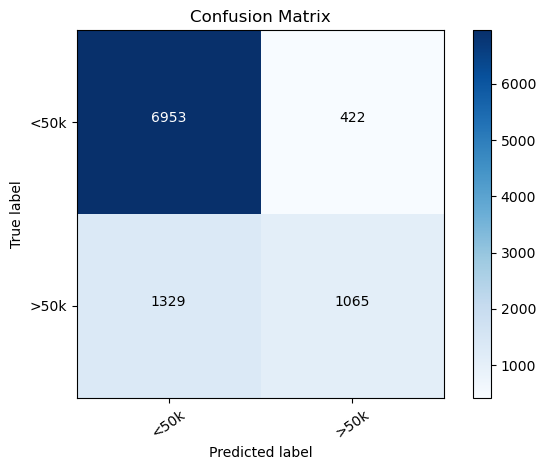

-----------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7375
           1       0.72      0.44      0.55      2394

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model:  0.8207595455010749


In [176]:
plot_confusion_metrix(y_test, y_pred, classes = ["<50k", ">50k"])

Normalized Confusion Matrix


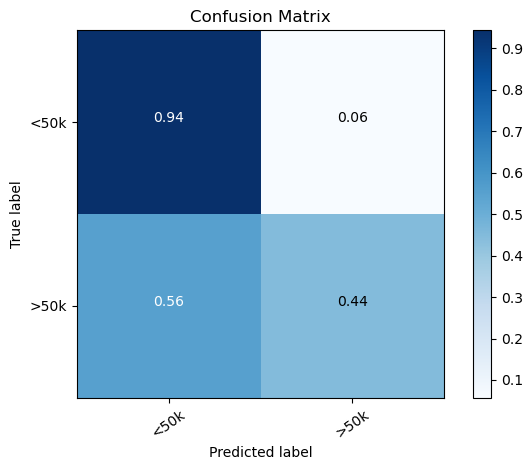

-----------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7375
           1       0.72      0.44      0.55      2394

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model:  0.8207595455010749


In [178]:
plot_confusion_metrix(y_test, y_pred, classes = ["<50k", ">50k"], normalize = True)

## GradientBoosting

In [179]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [180]:
def model_building(model,x_train, y_train,x_test,y_test,classes = ["<50k", ">50k"]):
    cls = model
    cls.fit(x_train, y_train)
    y_pred = cls.predict(x_test)

    plot_confusion_metrix(y_test,y_pred, classes = classes)


Confusion Matrix, Without Normalisation


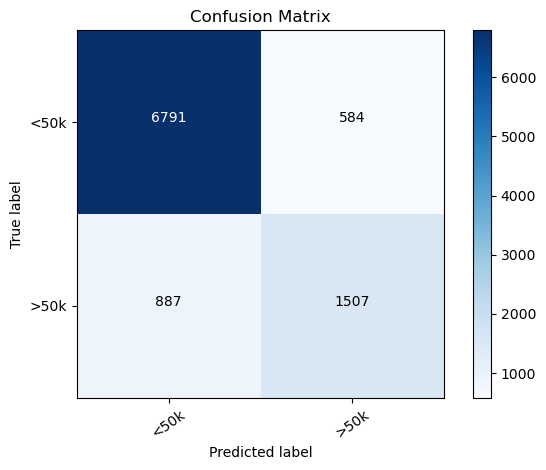

-----------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7375
           1       0.72      0.63      0.67      2394

    accuracy                           0.85      9769
   macro avg       0.80      0.78      0.79      9769
weighted avg       0.84      0.85      0.85      9769

Accuracy of the model:  0.8494216398812571


In [181]:
model = RandomForestClassifier()

model_building(model,
               x_train_scale, y_train,
               x_test_scale, y_test)

Confusion Matrix, Without Normalisation


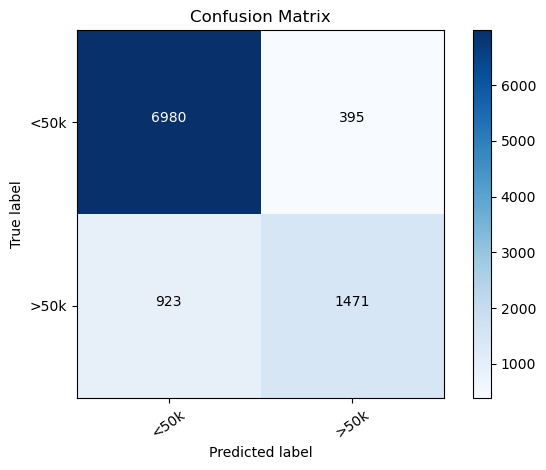

-----------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7375
           1       0.79      0.61      0.69      2394

    accuracy                           0.87      9769
   macro avg       0.84      0.78      0.80      9769
weighted avg       0.86      0.87      0.86      9769

Accuracy of the model:  0.8650834271675709


In [182]:
model = GradientBoostingClassifier()

model_building(model, 
               X_train_scale, 
               y_train,
               X_test_scale,
               y_test)

## Adjusting the threshold

In [184]:
y_pred[:25]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [185]:
## store the predicted probabilities

In [186]:
y_pred_prob = classifier.predict_proba(x_test_scale)
print(y_pred_prob[:25])

[[0.80177701 0.19822299]
 [0.89346958 0.10653042]
 [0.87967531 0.12032469]
 [0.94526145 0.05473855]
 [0.92264432 0.07735568]
 [0.96675315 0.03324685]
 [0.98446217 0.01553783]
 [0.82742695 0.17257305]
 [0.93064883 0.06935117]
 [0.75380664 0.24619336]
 [0.90414924 0.09585076]
 [0.97569868 0.02430132]
 [0.76639879 0.23360121]
 [0.97504692 0.02495308]
 [0.63522218 0.36477782]
 [0.77349979 0.22650021]
 [0.97037428 0.02962572]
 [0.85748754 0.14251246]
 [0.46066147 0.53933853]
 [0.94719106 0.05280894]
 [0.94452783 0.05547217]
 [0.98033481 0.01966519]
 [0.97853505 0.02146495]
 [0.95297906 0.04702094]
 [0.94580567 0.05419433]]


In [188]:
y_pred_class = []
for value in y_pred_prob[:,1]:
    if value > 0.4:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 

In [189]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(y_test,y_pred_class)
print(cfm)
acc=accuracy_score(y_test, y_pred_class)
print(classification_report(y_test, y_pred_class))
print("Accuracy of the model: ",acc)

[[6639  736]
 [1025 1369]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      7375
           1       0.65      0.57      0.61      2394

    accuracy                           0.82      9769
   macro avg       0.76      0.74      0.75      9769
weighted avg       0.81      0.82      0.82      9769

Accuracy of the model:  0.8197358992732112


In [190]:
for a in np.arange(0.3,0.71,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(y_test, predict_mine)
    total_err=round(cfm[0,1]+cfm[1,0])
    print("Threshold: {} TotalER: {}  Type 2: {}   Type 1: {}".format(round(a,2), total_err, cfm[1,0], cfm[0,1]))

Threshold: 0.3 TotalER: 2016  Type 2: 711   Type 1: 1305
Threshold: 0.31 TotalER: 1979  Type 2: 752   Type 1: 1227
Threshold: 0.32 TotalER: 1942  Type 2: 787   Type 1: 1155
Threshold: 0.33 TotalER: 1916  Type 2: 809   Type 1: 1107
Threshold: 0.34 TotalER: 1885  Type 2: 838   Type 1: 1047
Threshold: 0.35 TotalER: 1845  Type 2: 864   Type 1: 981
Threshold: 0.36 TotalER: 1818  Type 2: 897   Type 1: 921
Threshold: 0.37 TotalER: 1793  Type 2: 927   Type 1: 866
Threshold: 0.38 TotalER: 1792  Type 2: 968   Type 1: 824
Threshold: 0.39 TotalER: 1778  Type 2: 997   Type 1: 781
Threshold: 0.4 TotalER: 1761  Type 2: 1025   Type 1: 736
Threshold: 0.41 TotalER: 1777  Type 2: 1075   Type 1: 702
Threshold: 0.42 TotalER: 1777  Type 2: 1112   Type 1: 665
Threshold: 0.43 TotalER: 1762  Type 2: 1132   Type 1: 630
Threshold: 0.44 TotalER: 1750  Type 2: 1160   Type 1: 590
Threshold: 0.45 TotalER: 1746  Type 2: 1188   Type 1: 558
Threshold: 0.46 TotalER: 1742  Type 2: 1221   Type 1: 521
Threshold: 0.47 Total

## AUC and ROC Curve

In [191]:
from sklearn import metrics

In [192]:
from sklearn import metrics
fpr, tpr, z = metrics.roc_curve(y_test, y_pred_prob[:,1])
auc = metrics.auc(fpr,tpr)
print(auc)

0.8522116307718449


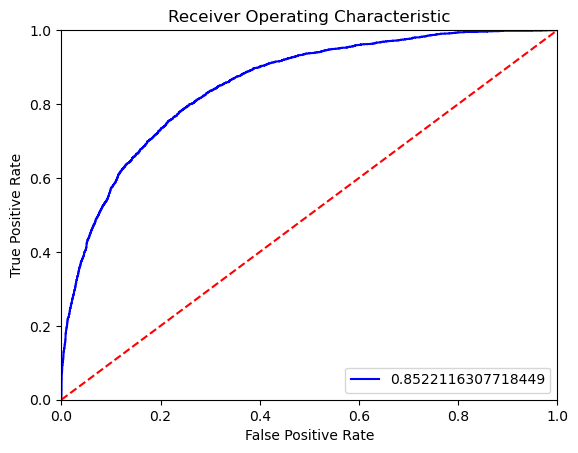

In [193]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [194]:
from sklearn import metrics
fpr, tpr,z = metrics.roc_curve(y_test, y_pred_class)
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)

0.7360248361015533
[0.         0.09979661 1.        ]
[0.         0.57184628 1.        ]


## Running model using cross validation

In [195]:
#Using cross validation
#older version
"""
classifier=(LogisticRegression())
from sklearn import cross_validation
#performing kfold_cross_validation
kfold_cv=cross_validation.KFold(n=len(X_train),n_folds=10)
print(kfold_cv)

#running the model using scoring metric as accuracy
kfold_cv_result=cross_validation.cross_val_score(estimator=classifier,X=X_train,
                                                 y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())


for train_value, test_value in kfold_cv:
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])


Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

"""

'\nclassifier=(LogisticRegression())\nfrom sklearn import cross_validation\n#performing kfold_cross_validation\nkfold_cv=cross_validation.KFold(n=len(X_train),n_folds=10)\nprint(kfold_cv)\n\n#running the model using scoring metric as accuracy\nkfold_cv_result=cross_validation.cross_val_score(estimator=classifier,X=X_train,\n                                                 y=Y_train, cv=kfold_cv)\nprint(kfold_cv_result)\n#finding the mean\nprint(kfold_cv_result.mean())\n\n\nfor train_value, test_value in kfold_cv:\n    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])\n\n\nY_pred=classifier.predict(X_test)\n#print(list(zip(Y_test,Y_pred)))\n\n'

In [196]:
classifier = LogisticRegression()

from sklearn.model_selection import KFold

kfold_cv=KFold(n_splits=10,
               random_state=10, 
               shuffle=True)
print(kfold_cv)

KFold(n_splits=10, random_state=10, shuffle=True)


In [197]:
from sklearn.model_selection import cross_val_score

kfold_cv_result=cross_val_score(estimator=classifier,
                                X=X_train_scale,
                                y=y_train, 
                                cv=kfold_cv)

print(kfold_cv_result)

#finding the mean
print(kfold_cv_result.mean())

[0.84078947 0.8254386  0.80824923 0.81132075 0.81395349 0.82185169
 0.83018868 0.83062747 0.82492321 0.82229048]
0.8229633072369383


In [199]:
classifier = LogisticRegression()

for train_value, test_value in kfold_cv.split(X_train_scale):
    
    classifier.fit(X_train_scale[train_value], y_train[train_value]).predict(X_train_scale[test_value])

    
y_pred=classifier.predict(X_test_scale)
#print(list(zip(Y_test,Y_pred)))

In [200]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(y_test, y_pred)
print(cfm)
print()


print("Classification report: ")

print(classification_report(y_test, y_pred))

acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",acc)

[[6952  423]
 [1328 1066]]

Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7375
           1       0.72      0.45      0.55      2394

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model:  0.8207595455010749


## Feature selection using Recursive Feature Elimination

In [202]:
X = adult_df_rev.values[:,:-1]
Y = adult_df_rev.values[:,-1]

#print(X)

In [203]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)
print(X)

[[ 0.03067056  2.15057856  1.13473876 ... -0.21665953 -0.03542945
   0.29156857]
 [ 0.83710898  1.46373585  1.13473876 ... -0.21665953 -2.22215312
   0.29156857]
 [-0.04264203  0.09005041 -0.42005962 ... -0.21665953 -0.03542945
   0.29156857]
 ...
 [ 1.42360965  0.09005041 -0.42005962 ... -0.21665953 -0.03542945
   0.29156857]
 [-1.21564337  0.09005041 -0.42005962 ... -0.21665953 -1.65522476
   0.29156857]
 [ 0.98373415  0.77689313 -0.42005962 ... -0.21665953 -0.03542945
   0.29156857]]


In [204]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)  


In [205]:
from sklearn.linear_model import LogisticRegression
#create a model
classifier=(LogisticRegression())

In [206]:
import warnings
warnings.filterwarnings("ignore")

In [207]:
colname=adult_df_rev.columns

In [208]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=classifier, n_features_to_select=8, verbose=1)
model_rfe = rfe.fit(X_train, Y_train)
print("Num Features: ",model_rfe.n_features_)
print("Selected Features: ") 
print(list(zip(colname, model_rfe.support_)))
print("Feature Ranking: ", model_rfe.ranking_) 

Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Num Features:  8
Selected Features: 
[('age', True), ('workclass', False), ('education_num', True), ('marital_status', True), ('occupation', False), ('relationship', True), ('race', False), ('sex', True), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', False)]
Feature Ranking:  [1 5 1 1 3 1 2 1 1 1 1 4]


In [209]:
Y_pred=model_rfe.predict(X_test)

In [213]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

confusion_matrix=confusion_matrix(Y_test,Y_pred)
print(confusion_matrix)
print()


print("Classification report: ")

print(classification_report(Y_test,Y_pred))

accuracy_score=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",accuracy_score)


[[7011  412]
 [1323 1023]]

Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7423
           1       0.71      0.44      0.54      2346

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model:  0.8223973794656567


In [214]:
"""new_data=adult_df_rev[['age','workclass','occupation','sex','income']]
new_data.head()
new_X=new_data.values[:,:-1]
new_Y=new_data.values[:,-1]
print(new_X)
print(new_Y)
"""

"new_data=adult_df_rev[['age','workclass','occupation','sex','income']]\nnew_data.head()\nnew_X=new_data.values[:,:-1]\nnew_Y=new_data.values[:,-1]\nprint(new_X)\nprint(new_Y)\n"

## Using SGD Classifier

In [219]:
from sklearn.linear_model import SGDClassifier

# Create a SGDClassifier model with 'log_loss' for logistic regression
classifier = SGDClassifier(loss="log_loss", random_state=10, eta0=0.00001, alpha=0.01, max_iter=1000)

# Fitting the model to the training data
classifier.fit(X_train, Y_train)

# Predicting labels for the test data
Y_pred = classifier.predict(X_test)

# Printing coefficients of the model
print("Coefficients:")
print(list(zip(adult_df_rev.columns[:-1], classifier.coef_.ravel())))

# Printing intercept of the model
print("Intercept:", classifier.intercept_)


Coefficients:
[('age', 0.444753637517388), ('workclass', -0.02616505053617527), ('education_num', 0.7665561526485352), ('marital_status', -0.30970521521237093), ('occupation', 0.058127109798968096), ('relationship', -0.21341739371582982), ('race', 0.10410824964479358), ('sex', 0.36923313488911924), ('capital_gain', 1.1555955229250874), ('capital_loss', 0.22962840189529812), ('hours_per_week', 0.3502848750798088), ('native_country', 0.025028258638921927)]
Intercept: [-1.50758594]


In [220]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[7046  377]
 [1347  999]]
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7423
           1       0.73      0.43      0.54      2346

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.71      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model:  0.8235233903163067


## Feature selection using Univariate Selection

In [221]:
X = adult_df_rev.values[:,:-1]
y = adult_df_rev.values[:,-1]

In [222]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

colname =  adult_df_rev.columns
test = SelectKBest(score_func=chi2, k=3)
fit1 = test.fit(X, y)

print(fit1.scores_)
print(list(zip(colname,fit1.get_support())))
X = fit1.transform(X)


[8.60061182e+03 4.75081192e+01 2.40142178e+03 1.12346982e+03
 5.04558854e+02 3.65914312e+03 3.30313051e+01 5.02439419e+02
 8.21924671e+07 1.37214589e+06 6.47640900e+03 1.36192560e+01]
[('age', True), ('workclass', False), ('education_num', False), ('marital_status', False), ('occupation', False), ('relationship', False), ('race', False), ('sex', False), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', False), ('native_country', False)]


In [223]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

In [224]:
from sklearn.model_selection import train_test_split
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3,random_state=10)  

In [225]:
from sklearn.linear_model import LogisticRegression
#create a model
classifier= LogisticRegression()
#fitting training data to the model
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

In [226]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

confusion_matrix=confusion_matrix(Y_test,Y_pred)
print(confusion_matrix)
print()

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

accuracy_score=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",accuracy_score)

[[7192  231]
 [1714  632]]

Classification report: 
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      7423
           1       0.73      0.27      0.39      2346

    accuracy                           0.80      9769
   macro avg       0.77      0.62      0.64      9769
weighted avg       0.79      0.80      0.76      9769

Accuracy of the model:  0.80090080868052


In [227]:
X = adult_df_rev.values[:,:-1]
Y = adult_df_rev.values[:,-1]

In [228]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(2)
fit1 = vt.fit(X, Y)
print(fit1.variances_)

features = fit1.transform(X)
print(features)
print(features.shape[1])
print(list(zip(colname,fit1.get_support())))

[1.86055686e+02 2.11975372e+00 6.61868663e+00 2.26863420e+00
 1.78826806e+01 2.58163360e+00 7.20448827e-01 2.21369502e-01
 5.45408641e+07 1.62371951e+05 1.52454313e+02 6.12096834e+01]
[[39  7 13 ...  0 40 39]
 [50  6 13 ...  0 13 39]
 [38  4  9 ...  0 40 39]
 ...
 [58  4  9 ...  0 40 39]
 [22  4  9 ...  0 20 39]
 [52  5  9 ...  0 40 39]]
10
[('age', True), ('workclass', True), ('education_num', True), ('marital_status', True), ('occupation', True), ('relationship', True), ('race', False), ('sex', False), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', True)]


In [229]:
X = adult_df_rev.values[:,:-1]
Y = adult_df_rev.values[:,-1]

In [230]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)


In [231]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)  

In [232]:
import statsmodels.api as sm
#Build Logit Model
logit = sm.Logit(Y_train,X_train)

# fit the model
model1 = logit.fit()

# Prining Logistic Regression model results 
model1.summary2()

Optimization terminated successfully.
         Current function value: 0.462403
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: y                Pseudo R-squared: 0.163     
Date:               2024-05-15 21:19 AIC:              21102.1669
No. Observations:   22792            BIC:              21198.5769
Df Model:           11               Log-Likelihood:   -10539.   
Df Residuals:       22780            LL-Null:          -12589.   
Converged:          1.0000           LLR p-value:      0.0000    
No. Iterations:     8.0000           Scale:            1.0000    
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
x1        0.3390     0.0189    17.9049   0.0000    0.3019    0.3762
x2       -0.0237     0.0178    -1.3325   0.1827   -0.0585    0.0112
x3        0.6788     0.0192    35.4188   0.0000    0.6412    0.7163
x4       -0.2260     0.0184   -12.2960   0.0000   -0.2620   -0.1900
x5        0.0481     0.0176     2.7379   0.0062    0.0137    0.0825
x6       -0.1293     0.0230    -5.6247   0.0000   -0.1743   -0.0842
x7        0.0784     0.0184     4.2663   0.0000    0.0424    0.1145
x8        0.3023     0.0227    13.2903   0.0000    0.2577    0.3469
x9        7.8351     0.1224    64.0031   0.0000    7.5952    8.0751
x10       0.2825     0.0160    17.6736   0.0000    0.2512    0.3138
x11       0.2752     0.0186    14.8288   0.0000    0.2388    0.3115
x12       0.0121     0.0175     0.6929   0.4884   -0.0222    0.0464
=================================================================

"""

In [233]:
# Predict values using test data
Y_pred = model1.predict(X_test)
print(Y_pred)

[0.09675993 0.08430848 0.99100485 ... 0.24320971 0.27092678 0.79724891]


In [237]:
predicted_df = pd.DataFrame(Y_pred)
predicted_df.head(12)

,0
0,0.096760
1,0.084308
2,0.991005
3,0.418448
4,1.000000
5,0.080840
6,0.276021
7,0.775279
8,0.120070
9,0.162172


In [238]:
predicted_df['Predicted_Class'] = np.where(predicted_df[0]>= 0.50,1,0)
predicted_df.head(5)

,0,Predicted_Class
0,0.096760,0
1,0.084308,0
2,0.991005,1
3,0.418448,0
4,1.000000,1


In [239]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

confusion_matrix=confusion_matrix(Y_test,predicted_df.Predicted_Class)
print(confusion_matrix)
print()


print("Classification report: ")

print(classification_report(Y_test,predicted_df.Predicted_Class))

accuracy_score=accuracy_score(Y_test, predicted_df.Predicted_Class)
print("Accuracy of the model: ",accuracy_score)

[[6633  790]
 [1075 1271]]

Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      7423
           1       0.62      0.54      0.58      2346

    accuracy                           0.81      9769
   macro avg       0.74      0.72      0.73      9769
weighted avg       0.80      0.81      0.80      9769

Accuracy of the model:  0.8090899785034292
